In [36]:
import pandas as pd

In [37]:
data_df = pd.read_excel('TÜRKİYE son veriler.xlsx', 'Sheet1', index_col=None)
data_df.to_csv('csvfile.csv', encoding='utf-8', index=False)

In [38]:
import numpy as np
import pandas as pd

In [39]:
import statsmodels.api as sm

In [40]:
df = pd.read_csv('csvfile.csv', index_col=0)
df.head()

,TSHGDP,TNFS,HB1000,NARTH,DYBT,GDPPC,KOH,Agedependencyratio_old,Agedependencyratio_young,Agedependencyratio,...,Population ages 65 and above female,Population ages 65 and above male,Population ages 65-69 female,Population ages 65-69 male,Population ages 70-74 female,Population ages 70-74 male,Population ages 75-79 female,Population ages 75-79 male,Population ages 80 and above female,Population ages 80 and above male
yıl,,,,,,,,,,,,,,,,,,,,,
1960,0.0,27472331,1.70,2.445584,45.369,3175.045236,20.281,5.810350,76.312601,82.122950,...,4.007752,2.367741,1.748972,1.045497,1.343665,0.798670,0.566391,0.322122,0.348723,0.201451
1961,0.0,28146893,1.70,2.425762,46.093,3134.778873,19.660,6.027037,77.101847,83.128884,...,4.123827,2.452845,1.815934,1.122401,1.319445,0.769262,0.622620,0.354237,0.365827,0.206945
1962,0.0,28832805,1.72,2.407683,46.830,3230.701825,19.037,6.283726,78.012002,84.295728,...,4.257872,2.554712,1.934471,1.237497,1.259165,0.716518,0.693300,0.396303,0.370937,0.204393
1963,0.0,29531342,1.73,2.393834,47.573,3440.259406,18.424,6.544614,78.821866,85.366480,...,4.388064,2.665295,2.061051,1.365518,1.197627,0.668419,0.757839,0.433030,0.371548,0.198327
1964,0.0,30244232,1.75,2.385335,48.312,3542.547613,17.831,6.761659,79.198037,85.959696,...,4.487175,2.776257,2.141028,1.478254,1.175050,0.655678,0.795021,0.448787,0.376075,0.193538


In [41]:
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.compat import lzip
from IPython.display import HTML, display
import seaborn as sns
sns.set_style("darkgrid")

In [42]:
y = df.GDPPC  # response

X = df.Agedependencyratio  # predictor

X = sm.add_constant(X)  # Adds a constant term to the predictor

X.head()

/Users/sanamjankurban/anaconda3/envs/ProjectECO/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,Agedependencyratio
yıl,,
1960,1.0,82.122950
1961,1.0,83.128884
1962,1.0,84.295728
1963,1.0,85.366480
1964,1.0,85.959696


In [43]:
model = sm.OLS(y, X).fit()

In [44]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  GDPPC   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     364.3
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           3.50e-26
Time:                        10:20:12   Log-Likelihood:                -489.43
No. Observations:                  58   AIC:                             982.9
Df Residuals:                      56   BIC:                             987.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.216e+04    803

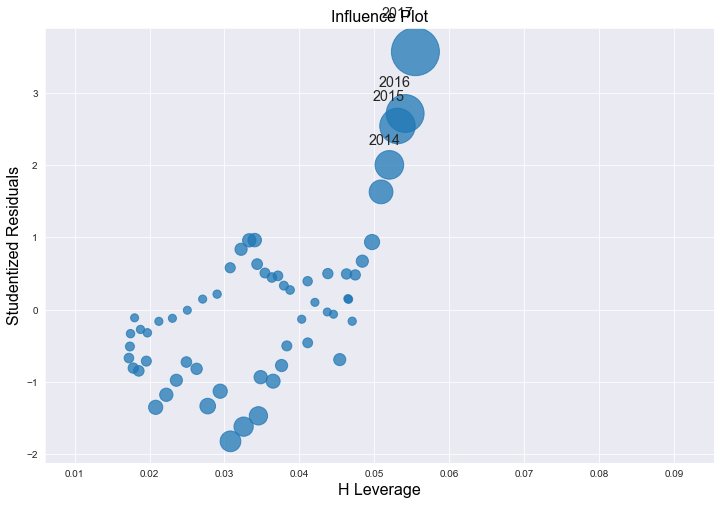

In [45]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, ax=ax, criterion="cooks")

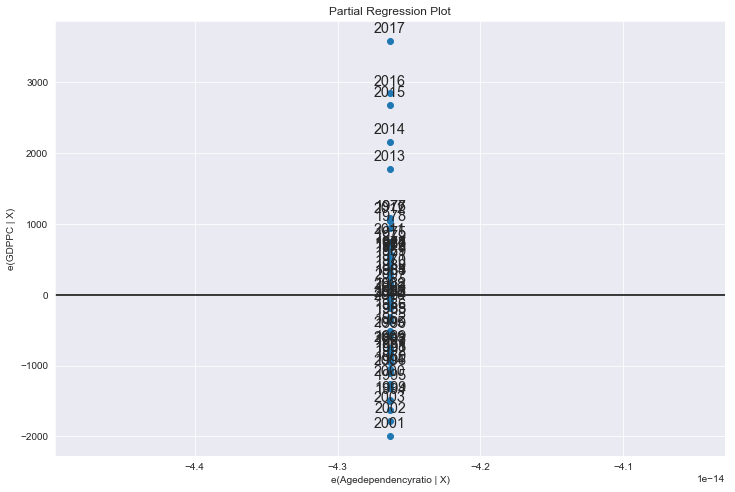

In [46]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.plot_partregress("GDPPC", "Agedependencyratio", ["Agedependencyratio"], data=df, ax=ax)

In [47]:
model2 = ols("GDPPC ~ Populationages0to14 + Populationage65andabove", data=df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  GDPPC   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     538.7
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           7.48e-37
Time:                        10:20:13   Log-Likelihood:                -460.16
No. Observations:                  58   AIC:                             926.3
Df Residuals:                      55   BIC:                             932.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2

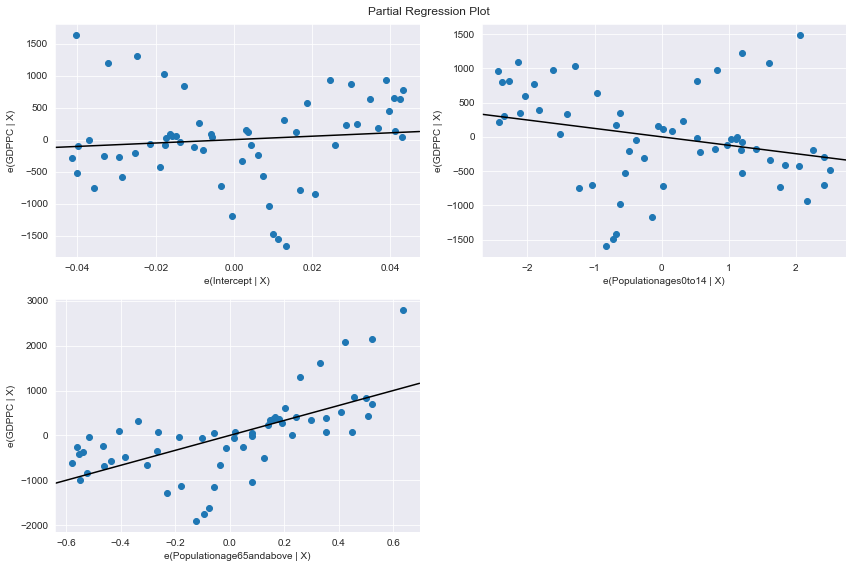

In [48]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model2, fig=fig)

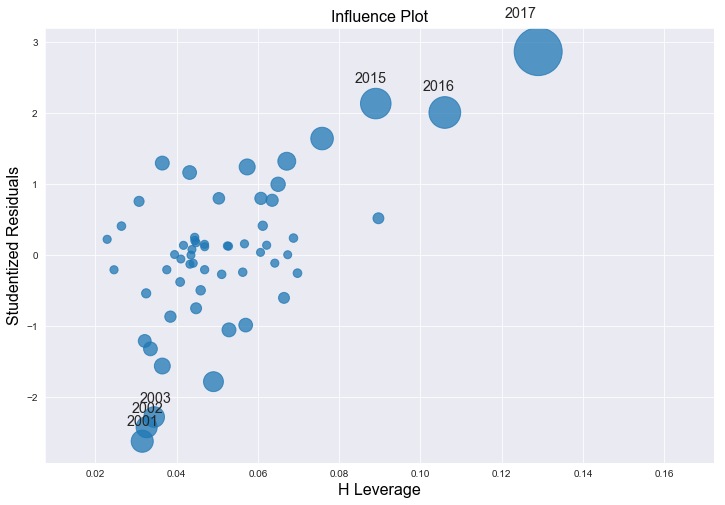

In [49]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model2, ax=ax, criterion="cooks")

In [50]:
model3 = ols("GDPPC ~ TSHGDP", data=df).fit()
model3_summary = model3.summary()
HTML(
(model3_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

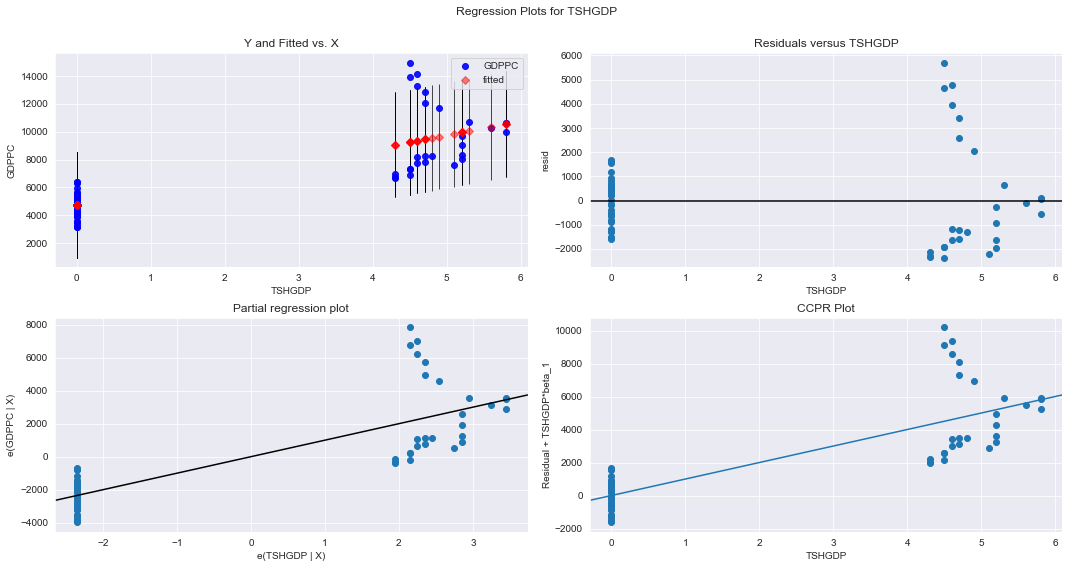

In [51]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model3, "TSHGDP", fig=fig)

In [52]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

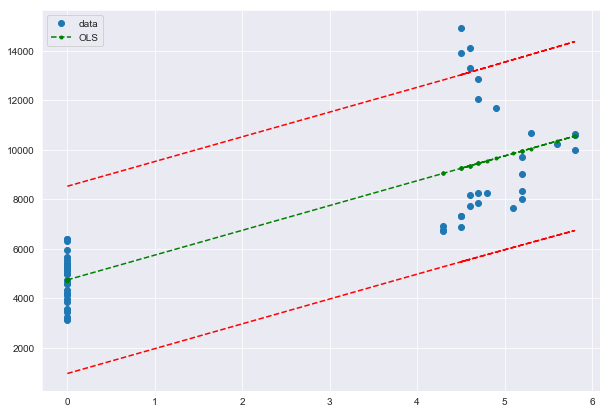

In [53]:
# predictor variable (x) and dependent variable (y)
x = df[['TSHGDP']]
y = df[['GDPPC']]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(model3) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(model3)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, model3.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best')